In [1]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\Users\aleen\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
Ravdess = "D:/SER/Ravdess/audio_speech_actors_01-24/"
Crema = "D:/SER/CREMA-D/AudioWAV/"
Tess = "D:/SER/TESS/TESS/"
Savee = "D:/SER/SAVEE/ALL/"

In [3]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        if part[2] != '08':
            file_emotion.append(int(part[2]))
            file_path.append(Ravdess + dir + '/' + file)
        
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
Ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust'}, inplace=True)
uniq= set(Ravdess_df['Emotions'])
print(uniq)

{'sad', 'fear', 'disgust', 'angry', 'neutral', 'happy'}


In [4]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
uniq= set(Crema_df['Emotions'])
print(uniq)

{'sad', 'fear', 'disgust', 'angry', 'neutral', 'happy'}


In [5]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
uniq= set(Tess_df['Emotions'])
print(uniq)

{'sad', 'fear', 'disgust', 'angry', 'neutral', 'happy'}


In [6]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df

Emotions                          Path
0      angry   D:/SER/SAVEE/ALL/DC_a01.wav
1      angry   D:/SER/SAVEE/ALL/DC_a02.wav
2      angry   D:/SER/SAVEE/ALL/DC_a03.wav
3      angry   D:/SER/SAVEE/ALL/DC_a04.wav
4      angry   D:/SER/SAVEE/ALL/DC_a05.wav
..       ...                           ...
415      sad  D:/SER/SAVEE/ALL/KL_sa11.wav
416      sad  D:/SER/SAVEE/ALL/KL_sa12.wav
417      sad  D:/SER/SAVEE/ALL/KL_sa13.wav
418      sad  D:/SER/SAVEE/ALL/KL_sa14.wav
419      sad  D:/SER/SAVEE/ALL/KL_sa15.wav

[420 rows x 2 columns]

In [7]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path

Emotions                                               Path
0    neutral  D:/SER/Ravdess/audio_speech_actors_01-24/Actor...
1    neutral  D:/SER/Ravdess/audio_speech_actors_01-24/Actor...
2    neutral  D:/SER/Ravdess/audio_speech_actors_01-24/Actor...
3    neutral  D:/SER/Ravdess/audio_speech_actors_01-24/Actor...
4    neutral  D:/SER/Ravdess/audio_speech_actors_01-24/Actor...
..       ...                                                ...
415      sad                       D:/SER/SAVEE/ALL/KL_sa11.wav
416      sad                       D:/SER/SAVEE/ALL/KL_sa12.wav
417      sad                       D:/SER/SAVEE/ALL/KL_sa13.wav
418      sad                       D:/SER/SAVEE/ALL/KL_sa14.wav
419      sad                       D:/SER/SAVEE/ALL/KL_sa15.wav

[11510 rows x 2 columns]

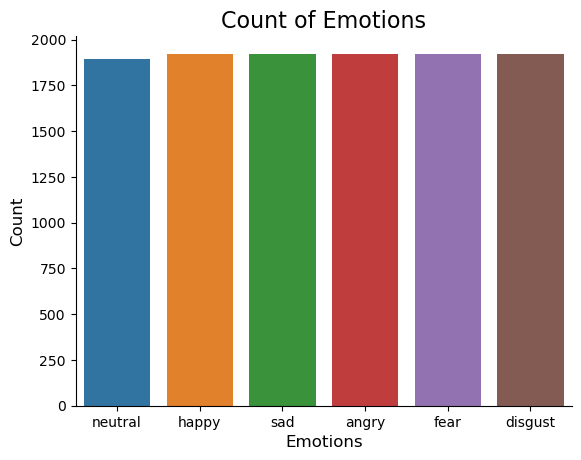

In [8]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()


In [9]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

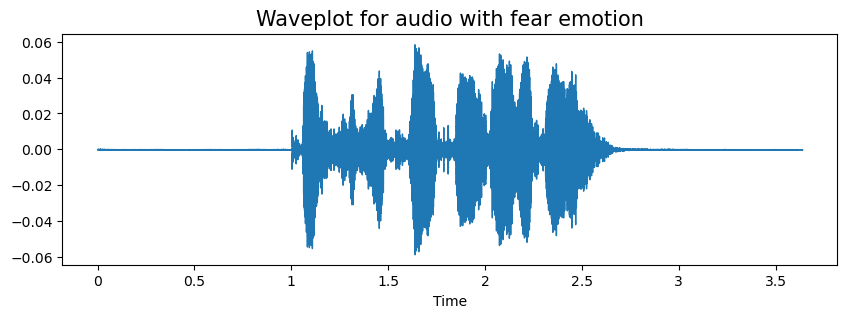

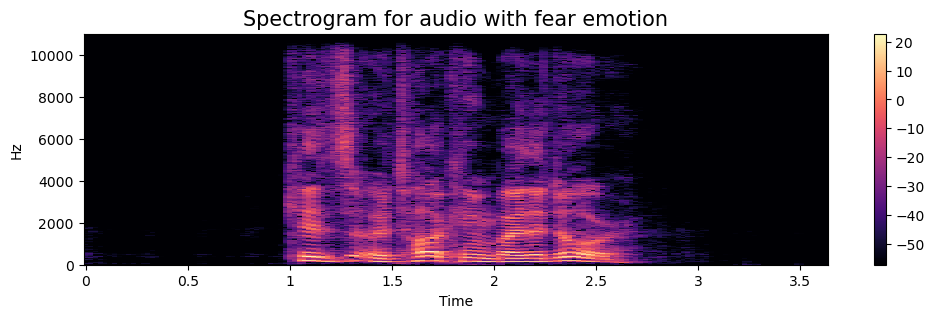

In [10]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

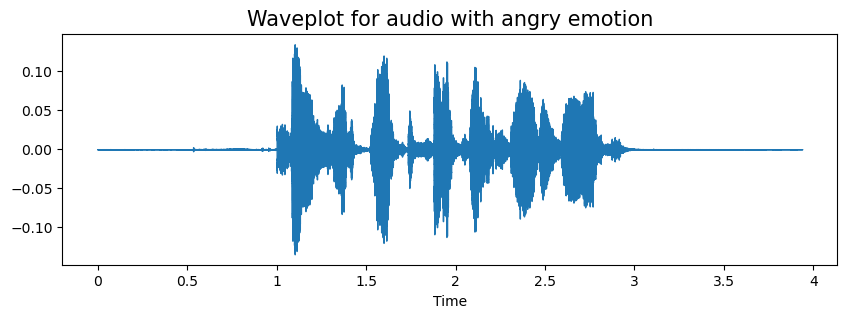

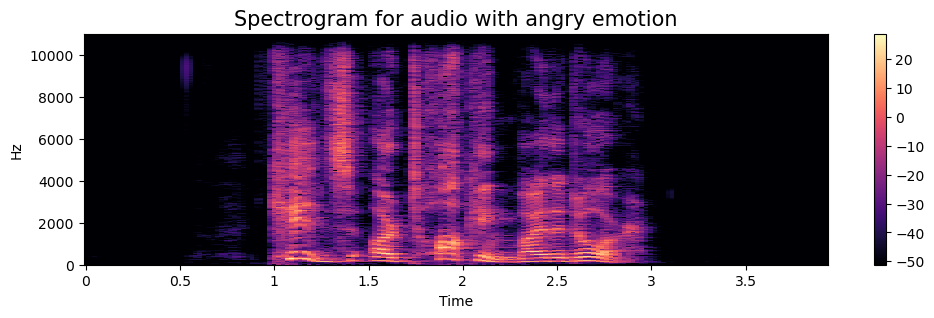

In [11]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

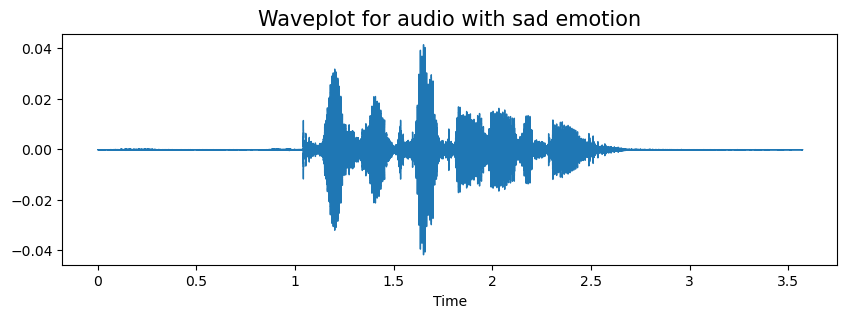

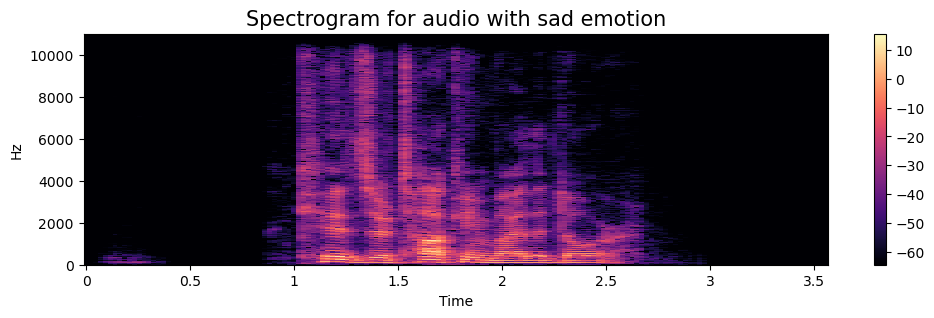

In [12]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

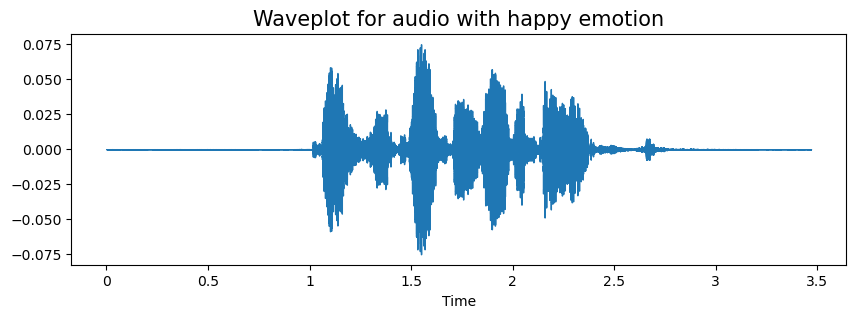

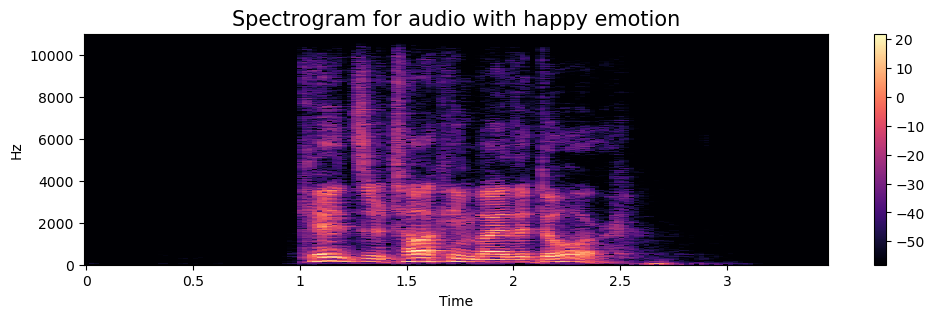

In [13]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [14]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

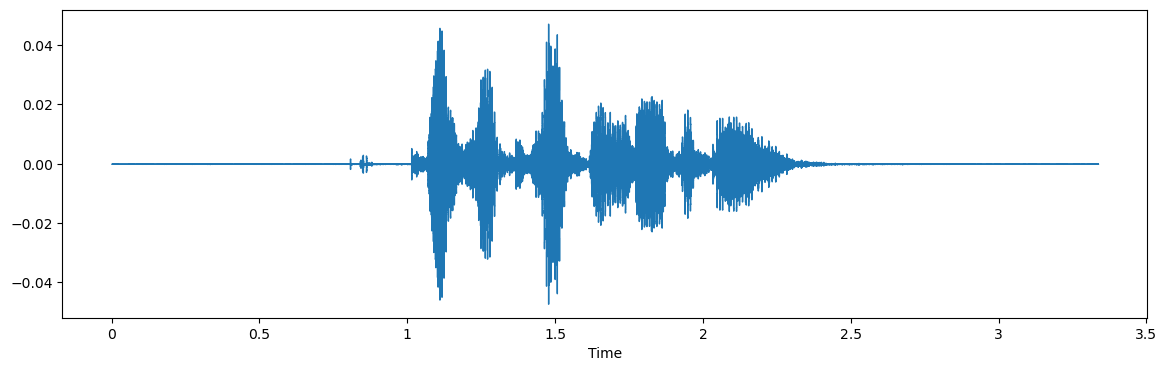

In [15]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

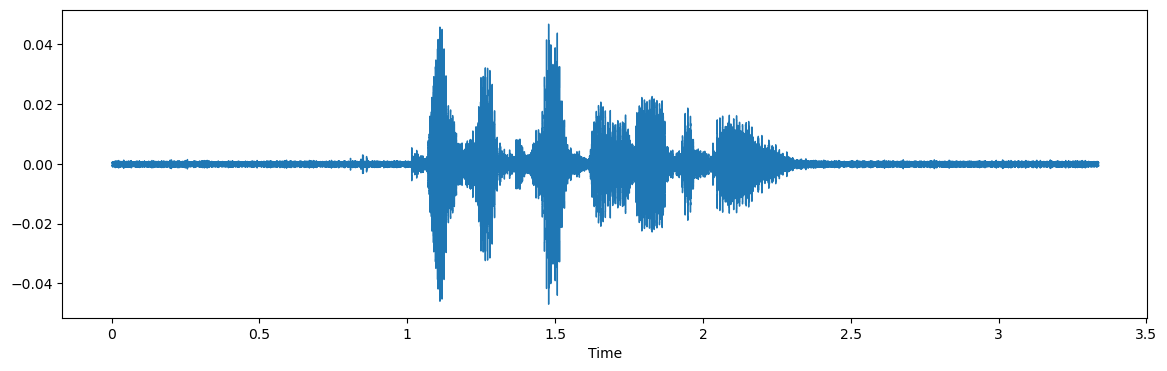

In [16]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

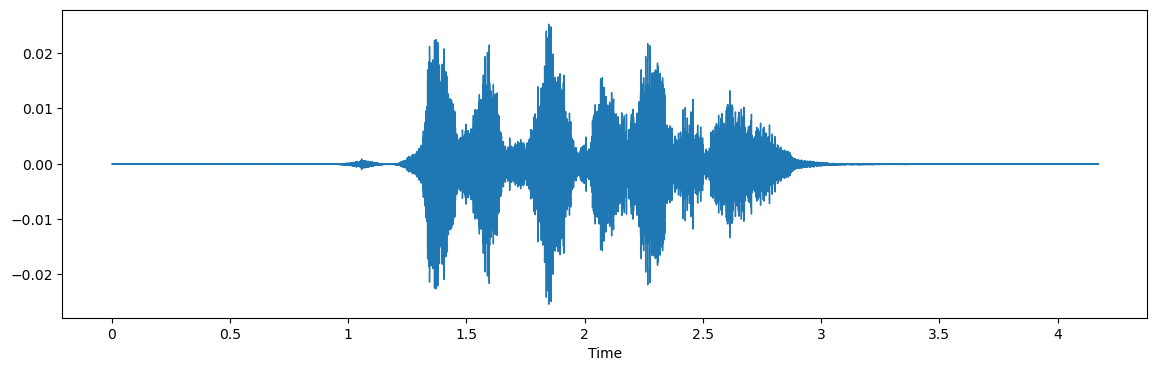

In [17]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

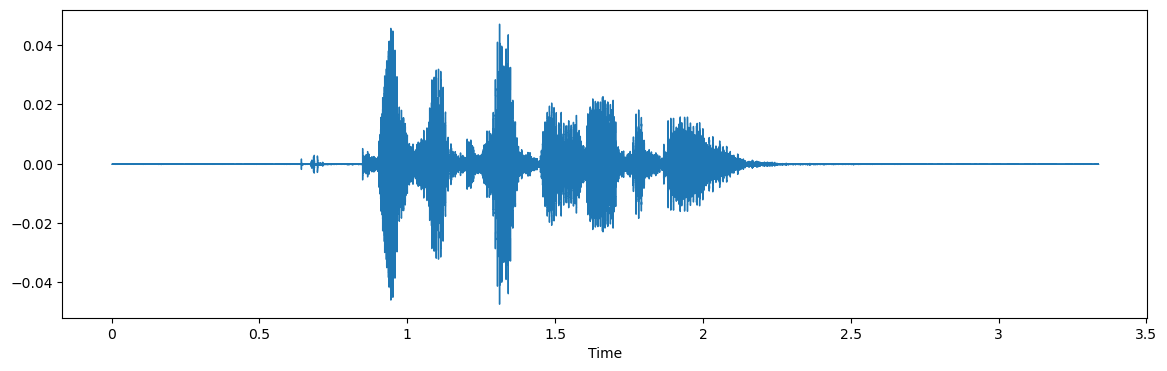

In [18]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

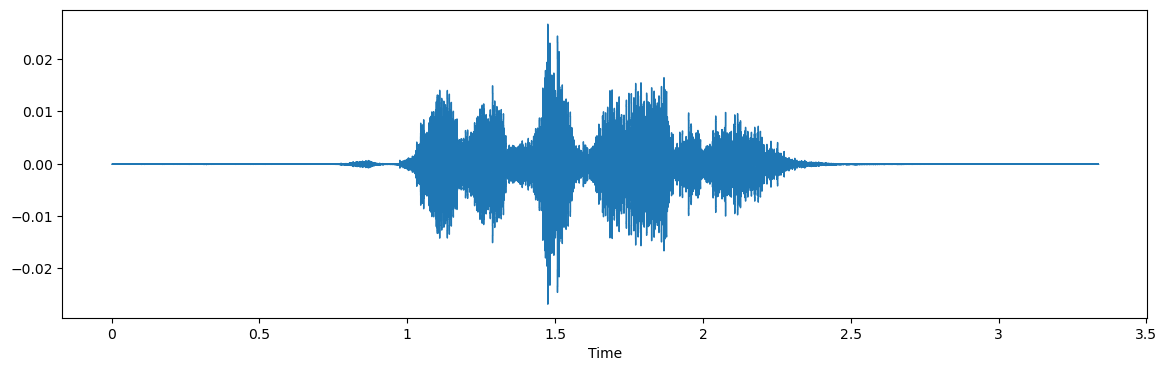

In [19]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [20]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2, offset=0.6, sr=8025)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [21]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [22]:
len(X), len(Y), data_path.Path.shape

(34530, 34530, (11510,))

In [23]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features

0         1         2         3         4         5         6  \
0      0.209335  0.667705  0.723171  0.744171  0.691919  0.591356  0.649161   
1      0.248001  0.673388  0.720903  0.772677  0.721135  0.668415  0.656150   
2      0.167407  0.602868  0.648012  0.765338  0.725364  0.667427  0.524797   
3      0.225174  0.574263  0.630442  0.700850  0.702183  0.613436  0.555546   
4      0.264587  0.622355  0.695926  0.751891  0.718955  0.672079  0.661818   
...         ...       ...       ...       ...       ...       ...       ...   
34525  0.074173  0.646107  0.619358  0.611917  0.516662  0.486514  0.496426   
34526  0.091553  0.613451  0.668562  0.654761  0.631482  0.501053  0.433869   
34527  0.029160  0.551379  0.715264  0.660360  0.589260  0.487133  0.479033   
34528  0.038712  0.618540  0.744178  0.702003  0.667363  0.602777  0.584974   
34529  0.029370  0.422881  0.571221  0.767186  0.612837  0.557947  0.541984   

              7         8         9  ...       153       154       155  \
0      0.680914  0.587151  0.568892  ...  0.000114  0.000160  0.000215   
1      0.716989  0.621536  0.583358  ...  0.000115  0.000161  0.000215   
2      0.673189  0.730260  0.596364  ...  0.000024  0.000020  0.000033   
3      0.615150  0.651923  0.541747  ...  0.000095  0.000153  0.000118   
4      0.706990  0.659864  0.552498  ...  0.000119  0.000181  0.000144   
...         ...       ...       ...  ...       ...       ...       ...   
34525  0.597218  0.563369  0.346818  ...  0.000025  0.000029  0.000024   
34526  0.492133  0.589581  0.520566  ...  0.000006  0.000005  0.000010   
34527  0.479754  0.422019  0.457144  ...  0.000027  0.000022  0.000014   
34528  0.558812  0.505514  0.526202  ...  0.000112  0.000121  0.000104   
34529  0.555293  0.558196  0.456909  ...  0.000005  0.000007  0.000012   

            156       157       158           159           160           161  \
0      0.000180  0.000248  0.000044  7.852578e-06  3.248136e-07  1.567397e-09   
1      0.000180  0.000248  0.000044  8.477813e-06  1.070044e-06  7.084831e-07   
2      0.000038  0.000061  0.000027  1.023990e-05  1.928940e-07  7.158587e-10   
3      0.000170  0.000214  0.000114  2.232636e-05  8.101229e-07  3.057758e-09   
4      0.000198  0.000224  0.000127  3.949387e-05  2.270509e-05  2.230426e-05   
...         ...       ...       ...           ...           ...           ...   
34525  0.000022  0.000024  0.000020  1.167575e-05  1.086707e-05  1.043631e-05   
34526  0.000005  0.000003  0.000002  1.176566e-06  8.426329e-08  8.319155e-09   
34527  0.000014  0.000007  0.000003  3.200992e-07  7.637342e-08  1.558202e-08   
34528  0.000105  0.000104  0.000088  8.692140e-05  8.383969e-05  8.902493e-05   
34529  0.000007  0.000005  0.000002  2.548977e-07  1.987083e-08  3.715938e-09   

        labels  
0      neutral  
1      neutral  
2      neutral  
3      neutral  
4      neutral  
...        ...  
34525      sad  
34526      sad  
34527      sad  
34528      sad  
34529      sad  

[34530 rows x 163 columns]

In [24]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [25]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25897, 162), (25897, 6), (8633, 162), (8633, 6))

In [27]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25897, 162), (25897, 6), (8633, 162), (8633, 6))

In [28]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25897, 162, 1), (25897, 6), (8633, 162, 1), (8633, 6))

In [31]:
model = Sequential()

# First convolutional block
model.add(Conv1D(filters=256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides=1, padding='same'))
model.add(Dropout(0.25))

# Second convolutional block
model.add(Conv1D(filters=128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=1, padding='valid'))
model.add(Dropout(0.2))

# Third convolutional block
model.add(Conv1D(filters=64, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=1, padding='valid'))

# Flatten and add fully connected layers
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))

# Output layer for 6 emotion classes with softmax activation
model.add(Dense(units=6, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 162, 256)          1536      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 162, 256)         0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 162, 256)          0         
                                                                 
 conv1d_4 (Conv1D)           (None, 162, 128)          163968    
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 158, 128)         0         
 1D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 158, 128)         

In [33]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=1, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=40, epochs=10, validation_data=(x_test, y_test), callbacks=[rlrp], validation_split=0.4)

Epoch 1/10
648/648 [==============================] - 110s 170ms/step - loss: 1.0611 - accuracy: 0.5724 - val_loss: 1.0568 - val_accuracy: 0.5713 - lr: 0.0010
Epoch 2/10
648/648 [==============================] - 157s 242ms/step - loss: 1.0522 - accuracy: 0.5758 - val_loss: 1.0283 - val_accuracy: 0.5858 - lr: 0.0010
Epoch 3/10
648/648 [==============================] - 216s 334ms/step - loss: 1.0454 - accuracy: 0.5824 - val_loss: 1.0270 - val_accuracy: 0.5924 - lr: 0.0010
Epoch 4/10
648/648 [==============================] - 212s 327ms/step - loss: 1.0406 - accuracy: 0.5828 - val_loss: 1.0261 - val_accuracy: 0.5850 - lr: 0.0010
Epoch 5/10
648/648 [==============================] - 212s 328ms/step - loss: 1.0279 - accuracy: 0.5877 - val_loss: 1.0042 - val_accuracy: 0.5938 - lr: 0.0010
Epoch 6/10
648/648 [==============================] - 216s 333ms/step - loss: 1.0211 - accuracy: 0.5883 - val_loss: 1.0091 - val_accuracy: 0.5950 - lr: 0.0010
Epoch 7/10
648/648 [==========================

In [ ]:
model.save('model.h5')

In [34]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")
# epochs = [i for i in range(50)]
# fig , ax = plt.subplots(1,2)
# train_acc = history.history['accuracy']
# train_loss = history.history['loss']
# test_acc = history.history['val_accuracy']
# test_loss = history.history['val_loss']

# fig.set_size_inches(20,6)
# ax[0].plot(epochs , train_loss , label = 'Training Loss')
# ax[0].plot(epochs , test_loss , label = 'Testing Loss')
# ax[0].set_title('Training & Testing Loss')
# ax[0].legend()
# ax[0].set_xlabel("Epochs")

# ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
# ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
# ax[1].set_title('Training & Testing Accuracy')
# ax[1].legend()
# ax[1].set_xlabel("Epochs")
# plt.show()

270/270 [==============================] - 12s 44ms/step - loss: 0.9882 - accuracy: 0.6041
Accuracy of our model on test data :  60.407739877700806 %


In [35]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

270/270 [==============================] - 12s 44ms/step


In [36]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0          neutral       neutral
1              sad           sad
2              sad           sad
3              sad          fear
4            happy          fear
5            happy         angry
6          neutral          fear
7          disgust       disgust
8            angry         angry
9            happy         happy

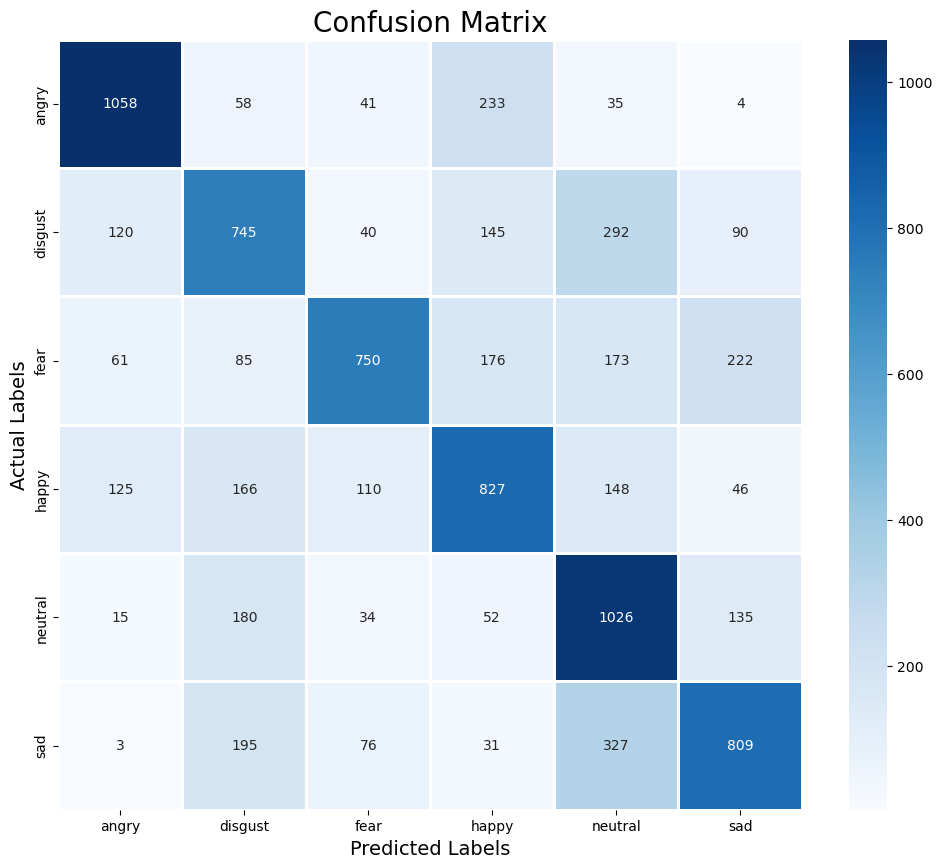

In [37]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.77      0.74      0.75      1429
     disgust       0.52      0.52      0.52      1432
        fear       0.71      0.51      0.60      1467
       happy       0.56      0.58      0.57      1422
     neutral       0.51      0.71      0.60      1442
         sad       0.62      0.56      0.59      1441

    accuracy                           0.60      8633
   macro avg       0.62      0.60      0.60      8633
weighted avg       0.62      0.60      0.60      8633

